In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


In [402]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv1D, MaxPooling1D, Flatten, Dropout, concatenate, BatchNormalization, Reshape, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [408]:
df = pd.read_csv('February.csv')
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [409]:
# Convert the Y/N to 1/0
df['Cover'] = df.Cover.eq('Y').mul(1)

# Rename columns to remove spaces
df = df.rename(columns={'Cash Sides': 'cash_sides',
                    'Ticket Sides': 'ticket_sides',
                    'Open ML': 'open_ml',
                    'Current ML': 'current_ml',
                    'Delta': 'delta',
                    'ML Delta': 'ml_delta'})

# Convert percents to decimals
df['cash_sides'] = df.cash_sides.str.strip('%-')
df['ticket_sides'] = df.ticket_sides.str.strip('%-')
df['open_ml'] = df.open_ml.str.strip('%-')
df['current_ml'] = df.current_ml.str.strip('%-')
df['delta'] = df.delta.str.strip('%-')
df['ml_delta'] = df.ml_delta.str.strip('%-')

for col in df.columns:
    df[col].replace('', np.nan, inplace=True)
    df.dropna(subset=[col], inplace=True)

In [410]:
features = ['cash_sides', 'ticket_sides', 'open_ml', 'current_ml', 'ml_delta']
df[features] = df[features].astype(np.int64)
df['Cover'] = df['Cover'].astype(np.int64)
df[features].astype(np.int64)
x = df[features]
y = df['Cover']

In [373]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [374]:
model = LogisticRegression(solver='saga', max_iter=4000)

In [375]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=4000, solver='saga')

In [376]:
y_pred=model.predict(x_test)

In [377]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116, 173],
       [153, 161]], dtype=int64)

In [378]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.4593698175787728
Precision: 0.4820359281437126
Recall: 0.5127388535031847


In [379]:
# Dense Model Trained off of 5 Features Extracted from Data
inputs = Input(shape=(5), name='InputFeat')
hidden = Dense(24, name = 'Hidden', activation='linear')(inputs)
hidden1 = Dense(128, name = 'Hidden1', activation='linear')(hidden)
hidden2 = Dense(256, name ='Hidden2', activation='tanh')(hidden1)
hidden3 = Dense(512, name = 'Hidden3', activation='linear')(hidden2)
hidden4 = Dense(1024, name = 'Hidden4', activation='linear')(hidden3)
hidden5 = Dense(512, name = 'Hidden5', activation = 'relu')(hidden4)
hidden6 = Dense(256, name = 'Hidden6', activation = 'relu')(hidden5)
hidden7 = Dense(128, name = 'Hidden7', activation = 'relu')(hidden6)
hidden8 = Dense(64, name = 'Hidden8', activation = 'relu')(hidden7)
output = Dense(1, name='Output')(hidden8)
dense = Model(inputs = inputs, outputs = output, name='Sequential')
print(dense.summary())

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputFeat (InputLayer)      [(None, 5)]               0         
                                                                 
 Hidden (Dense)              (None, 24)                144       
                                                                 
 Hidden1 (Dense)             (None, 128)               3200      
                                                                 
 Hidden2 (Dense)             (None, 256)               33024     
                                                                 
 Hidden3 (Dense)             (None, 512)               131584    
                                                                 
 Hidden4 (Dense)             (None, 1024)              525312    
                                                                 
 Hidden5 (Dense)             (None, 512)               5

In [380]:
opt = tf.keras.optimizers.Adam(1e-5)
opt.learning_rate.assign(1e-5)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-05>

In [381]:
dense.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

In [382]:
hist = dense.fit(x_train, y_train,epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
44/44 [==============================] - 1s 10ms/step - loss: 7.8498 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 2/20
44/44 [==============================] - 0s 7ms/step - loss: 7.8497 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 3/20
44/44 [==============================] - 0s 8ms/step - loss: 7.8497 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 7.8497 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 5/20
44/44 [==============================] - 0s 7ms/step - loss: 7.8497 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 6/20
44/44 [==============================] - 0s 8ms/step - loss: 7.8497 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 7/20
44/44 [==============================] - 0s 8ms/step - loss: 7.8497 - accuracy: 0.4911 - val_loss: 8.0322 - val_accuracy: 0.4793
Epoch 8/20
44/44 [=

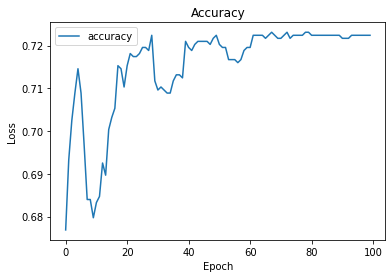

In [361]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.legend()
plt.title("Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [383]:
dense.evaluate(x_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 8.0322 - accuracy: 0.4793


[8.03222942352295, 0.4792703092098236]

In [411]:
x = np.expand_dims(x, axis=2)
y = np.expand_dims(y, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5)
n_timestepsDBP, n_featuresDBP, n_outputsDBP = x_train.shape[1], x_train.shape[2], y_train.shape[1]

In [419]:
dbp_inputs = Input(shape=(n_timestepsDBP, n_featuresDBP), name='InputDBP')
batch_n1 = BatchNormalization()(dbp_inputs)
conv1 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(batch_n1)
dense1 = Dense(3, activation='relu')(conv1)
conv2 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters = 64, kernel_size = 1, activation = 'relu')(dense1)
conv3 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters=128, kernel_size = 1, activation = 'linear')(conv2)
conv4 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters=128, kernel_size = 1, activation = 'relu')(conv3)
flat2 = Flatten()(conv4)
dense2 = Dense(64, activation='relu')(flat2)
output1 = Dense(n_outputsDBP, activation='linear', name='outputDBP')(dense2)
window = Model(inputs = dbp_inputs, outputs = output1, name='DBP')
print(window.summary())

Model: "DBP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputDBP (InputLayer)       [(None, 5, 1)]            0         
                                                                 
 batch_normalization_11 (Bat  (None, 5, 1)             4         
 chNormalization)                                                
                                                                 
 conv1d_27 (Conv1D)          (None, 5, 256)            512       
                                                                 
 dense_11 (Dense)            (None, 5, 3)              771       
                                                                 
 conv1d_28 (Conv1D)          (None, 5, 64)             256       
                                                                 
 conv1d_29 (Conv1D)          (None, 5, 128)            8320      
                                                               

In [420]:
window.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])
wind = window.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=32, epochs=1000)

Epoch 1/1000
44/44 [==============================] - 1s 6ms/step - loss: 2.3439 - accuracy: 0.4776 - val_loss: 1.4989 - val_accuracy: 0.5364
Epoch 2/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.5760 - accuracy: 0.4776 - val_loss: 1.2957 - val_accuracy: 0.5364
Epoch 3/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.3640 - accuracy: 0.4776 - val_loss: 1.1550 - val_accuracy: 0.5364
Epoch 4/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.2074 - accuracy: 0.4733 - val_loss: 1.0357 - val_accuracy: 0.5364
Epoch 5/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.0654 - accuracy: 0.4712 - val_loss: 0.9463 - val_accuracy: 0.5430
Epoch 6/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.9870 - accuracy: 0.4769 - val_loss: 0.9002 - val_accuracy: 0.5430
Epoch 7/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.9237 - accuracy: 0.4705 - val_loss: 0.8702 - val_accuracy: 0.5464
Epoch 

In [418]:
window.evaluate(x_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4603


[0.6992547512054443, 0.4602648913860321]